In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from scipy.io import loadmat  # this is the module that loads mat-files

plt.rcParams['figure.figsize'] = [15, 8]
#%matplotlib inline

In [207]:
def read_file_into_df(f_name):
    """ 
    Reads data from one .mat file into a DataFrame.
    Expects data files to be in the root/data_raw folder. 
    """
    
    mat = loadmat(f"data_raw/{f_name}")
    df = pd.DataFrame(mat['data'])
    df.columns = ['time_sec', 'time_microsec', 'signal_horizontal', 'signal_vertical', 'class']
    
    df['time_full'] = df['time_sec'] + (df['time_microsec'] / 1_000_000)
    #df['time_full_str'] = df['time_full_str'].astype(str)
    df = df[['time_sec','time_microsec','time_full','signal_horizontal','signal_vertical','class']]
    
    return df

def read_all_files():
    """
    Reads all data files into DataFrames and puts them into a 2D dictionary.
    To access a file, the first key is the participant (1 - 8), second key is the experiment (0, 1).
    Example: to get the data from the first experiment of participant 5, use dict[5][0]
    """
    
    d = {}
    
    for participant in range(1, 9):
        d[participant] = {}
        
        for experiment in range(0, 2):
            d[participant][experiment] = read_file_into_df(f"participant{participant}_{experiment}.mat")       
    return d

def all_datasets_read_correctly(d):
    """ Checks if all datasets were read correctly (all datasets contain all classes). """
    
    nr_of_datasets = 0
    
    for p in range(1, 9): # participant
        p_dict = d[p]
    
        for e in range(0, 2): # experiment
            e_dict = p_dict[e]
            labels = e_dict['class'].unique()
            
            for c in range(1, 9): # class label
                if c not in labels:
                    print(f"Class {c} not found in participant {p} experiment {e}!")
                    return
            nr_of_datasets += 1
    print("Looks good! All datasets contain all classes.")
    print(f"Total {nr_of_datasets} datasets.")
    
def print_dataset_sizes(d):
    for participant, exps in d.items():
        for experiment, data in exps.items():
            print(f"participant:{participant}   experiment:{experiment}   total rows:{len(data.index)}")
            
            for class_label in range(1, 9):
                df_class = data[data['class'] == class_label]
                print(f"\t\t     class:{class_label}   nr of rows:{len(df_class.index)}")
                
            print()
            
    

In [208]:
# Reads all datasets into 2D dict.
# First key is participant nr (1 - 8), second is experiment nr (0, 1)
dataset_dict = read_all_files()

# Example use
participant5_experiment0_data = dataset_dict[5][0]

# Do all datasets contain all classes?
all_datasets_read_correctly(dataset_dict)
print()

# Columns and their datatypes
print(f"Columns and their data types: \n{participant5_experiment0_data.dtypes}")
print()

# Sizes of datasets.
# Smallest class size belongs to participant 1, experiment 0, class 7; has only 398 rows
print_dataset_sizes(dataset_dict)
print()


Looks good! All datasets contain all classes.
Total 16 datasets.

Columns and their data types: 
time_sec               int32
time_microsec          int32
time_full            float64
signal_horizontal      int32
signal_vertical        int32
class                  int32
dtype: object

participant:1   experiment:0   total rows:97742
		     class:1   nr of rows:16299
		     class:2   nr of rows:6706
		     class:3   nr of rows:15014
		     class:4   nr of rows:23494
		     class:5   nr of rows:8977
		     class:6   nr of rows:25065
		     class:7   nr of rows:398
		     class:8   nr of rows:1789

participant:1   experiment:1   total rows:157976
		     class:1   nr of rows:10308
		     class:2   nr of rows:30140
		     class:3   nr of rows:30717
		     class:4   nr of rows:8526
		     class:5   nr of rows:35512
		     class:6   nr of rows:38634
		     class:7   nr of rows:1968
		     class:8   nr of rows:2171

participant:2   experiment:0   total rows:221051
		     class:1   nr of rows:30

In [209]:
# How consistent the machine's measuring time was?
stds = np.array([])

for participant, exps in dataset_dict.items():
    for experiment, data in exps.items():
        print(f"participant:{participant}   experiment:{experiment}")
        
        for class_label in range(1, 9):
            class_df = data[data['class'] == class_label]
            measurements = np.asarray(class_df['time_full'])
            helper = np.insert(measurements, 0, 0)
            
            last = measurements[-1]
            measurements = np.append(measurements, last)
            
            timediffs = np.asarray(measurements - helper)[1:-1]
            std = round(np.std(timediffs), 4)
            print(f"\tclass:{class_label}   measuring time std:{std} (sec)")
            stds = np.append(stds, std)
            
        print()
        
print(f"Mean std: {np.mean(stds)}")
            

participant:1   experiment:0
	class:1   measuring time std:0.1933 (sec)
	class:2   measuring time std:0.0955 (sec)
	class:3   measuring time std:0.0341 (sec)
	class:4   measuring time std:0.2048 (sec)
	class:5   measuring time std:0.0546 (sec)
	class:6   measuring time std:0.0217 (sec)
	class:7   measuring time std:0.163 (sec)
	class:8   measuring time std:0.033 (sec)

participant:1   experiment:1
	class:1   measuring time std:0.044 (sec)
	class:2   measuring time std:0.0184 (sec)
	class:3   measuring time std:0.1135 (sec)
	class:4   measuring time std:0.1012 (sec)
	class:5   measuring time std:0.0814 (sec)
	class:6   measuring time std:0.0094 (sec)
	class:7   measuring time std:0.0098 (sec)
	class:8   measuring time std:0.0153 (sec)

participant:2   experiment:0
	class:1   measuring time std:0.0158 (sec)
	class:2   measuring time std:0.009 (sec)
	class:3   measuring time std:0.0088 (sec)
	class:4   measuring time std:0.0088 (sec)
	class:5   measuring time std:0.093 (sec)
	class:6   me

Text(0, 0.5, 'signal')

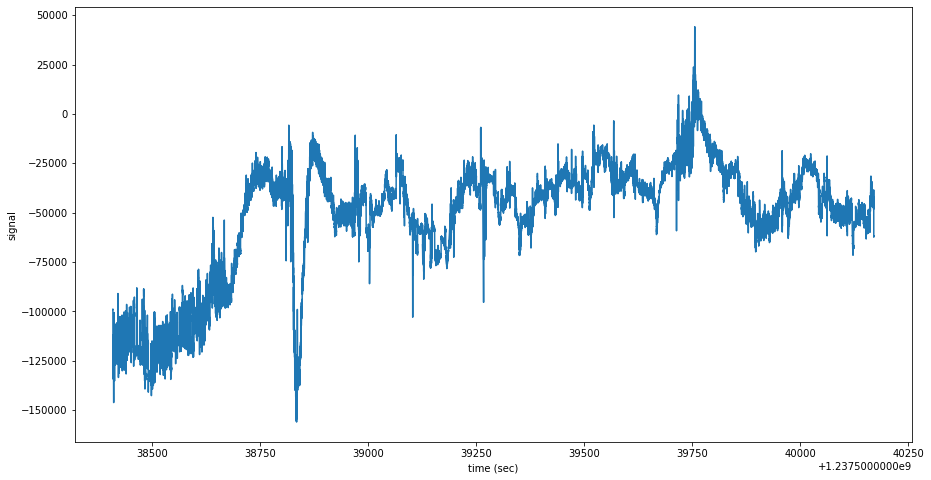

In [212]:
plt.plot(participant5_experiment0_data['time_full'], participant5_experiment0_data['signal_horizontal'])
plt.xlabel('time (sec)')
plt.ylabel('signal')

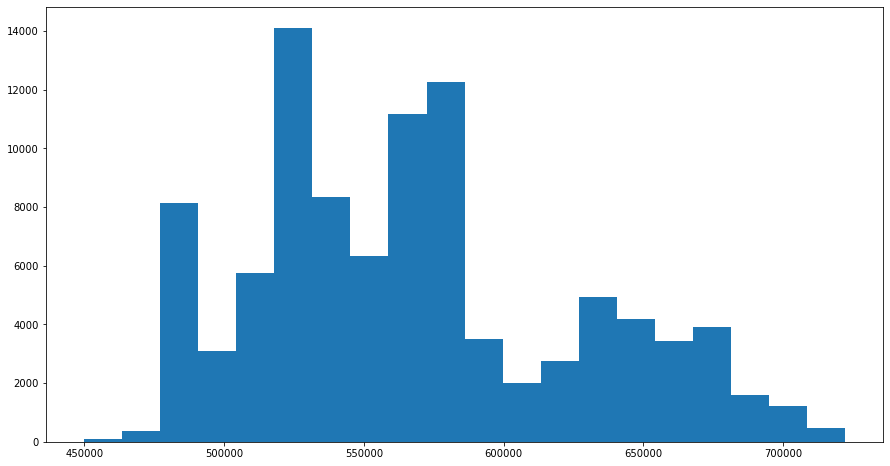

In [213]:
plt.hist(df.signal_horizontal, bins=20)
plt.show()